In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
from sklearn import tree



#### Source: Yahoo Finance 
#### Reporting the s&p 500 index prices (SPX),the united states oil fund (USO) , the SPDR Gold Trust which is an ETF that tracks the price of gold (GLD), SLV is an ETF that tracks the price of silver, and EUR/USD is the spot FX.


In [167]:
gold_prices_orig = pd.read_csv("Prices.csv")

### DATA VISUALIZATION:

In [168]:
print("number of null values: " + str(gold_prices_orig.isnull().sum().sum())) 


number of null values: 0


In [169]:
stats = gold_prices_orig.describe()
stats

SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798

Let's explore the prices :
I want to see how they vary WRT time.
Then check they follow some known distribution


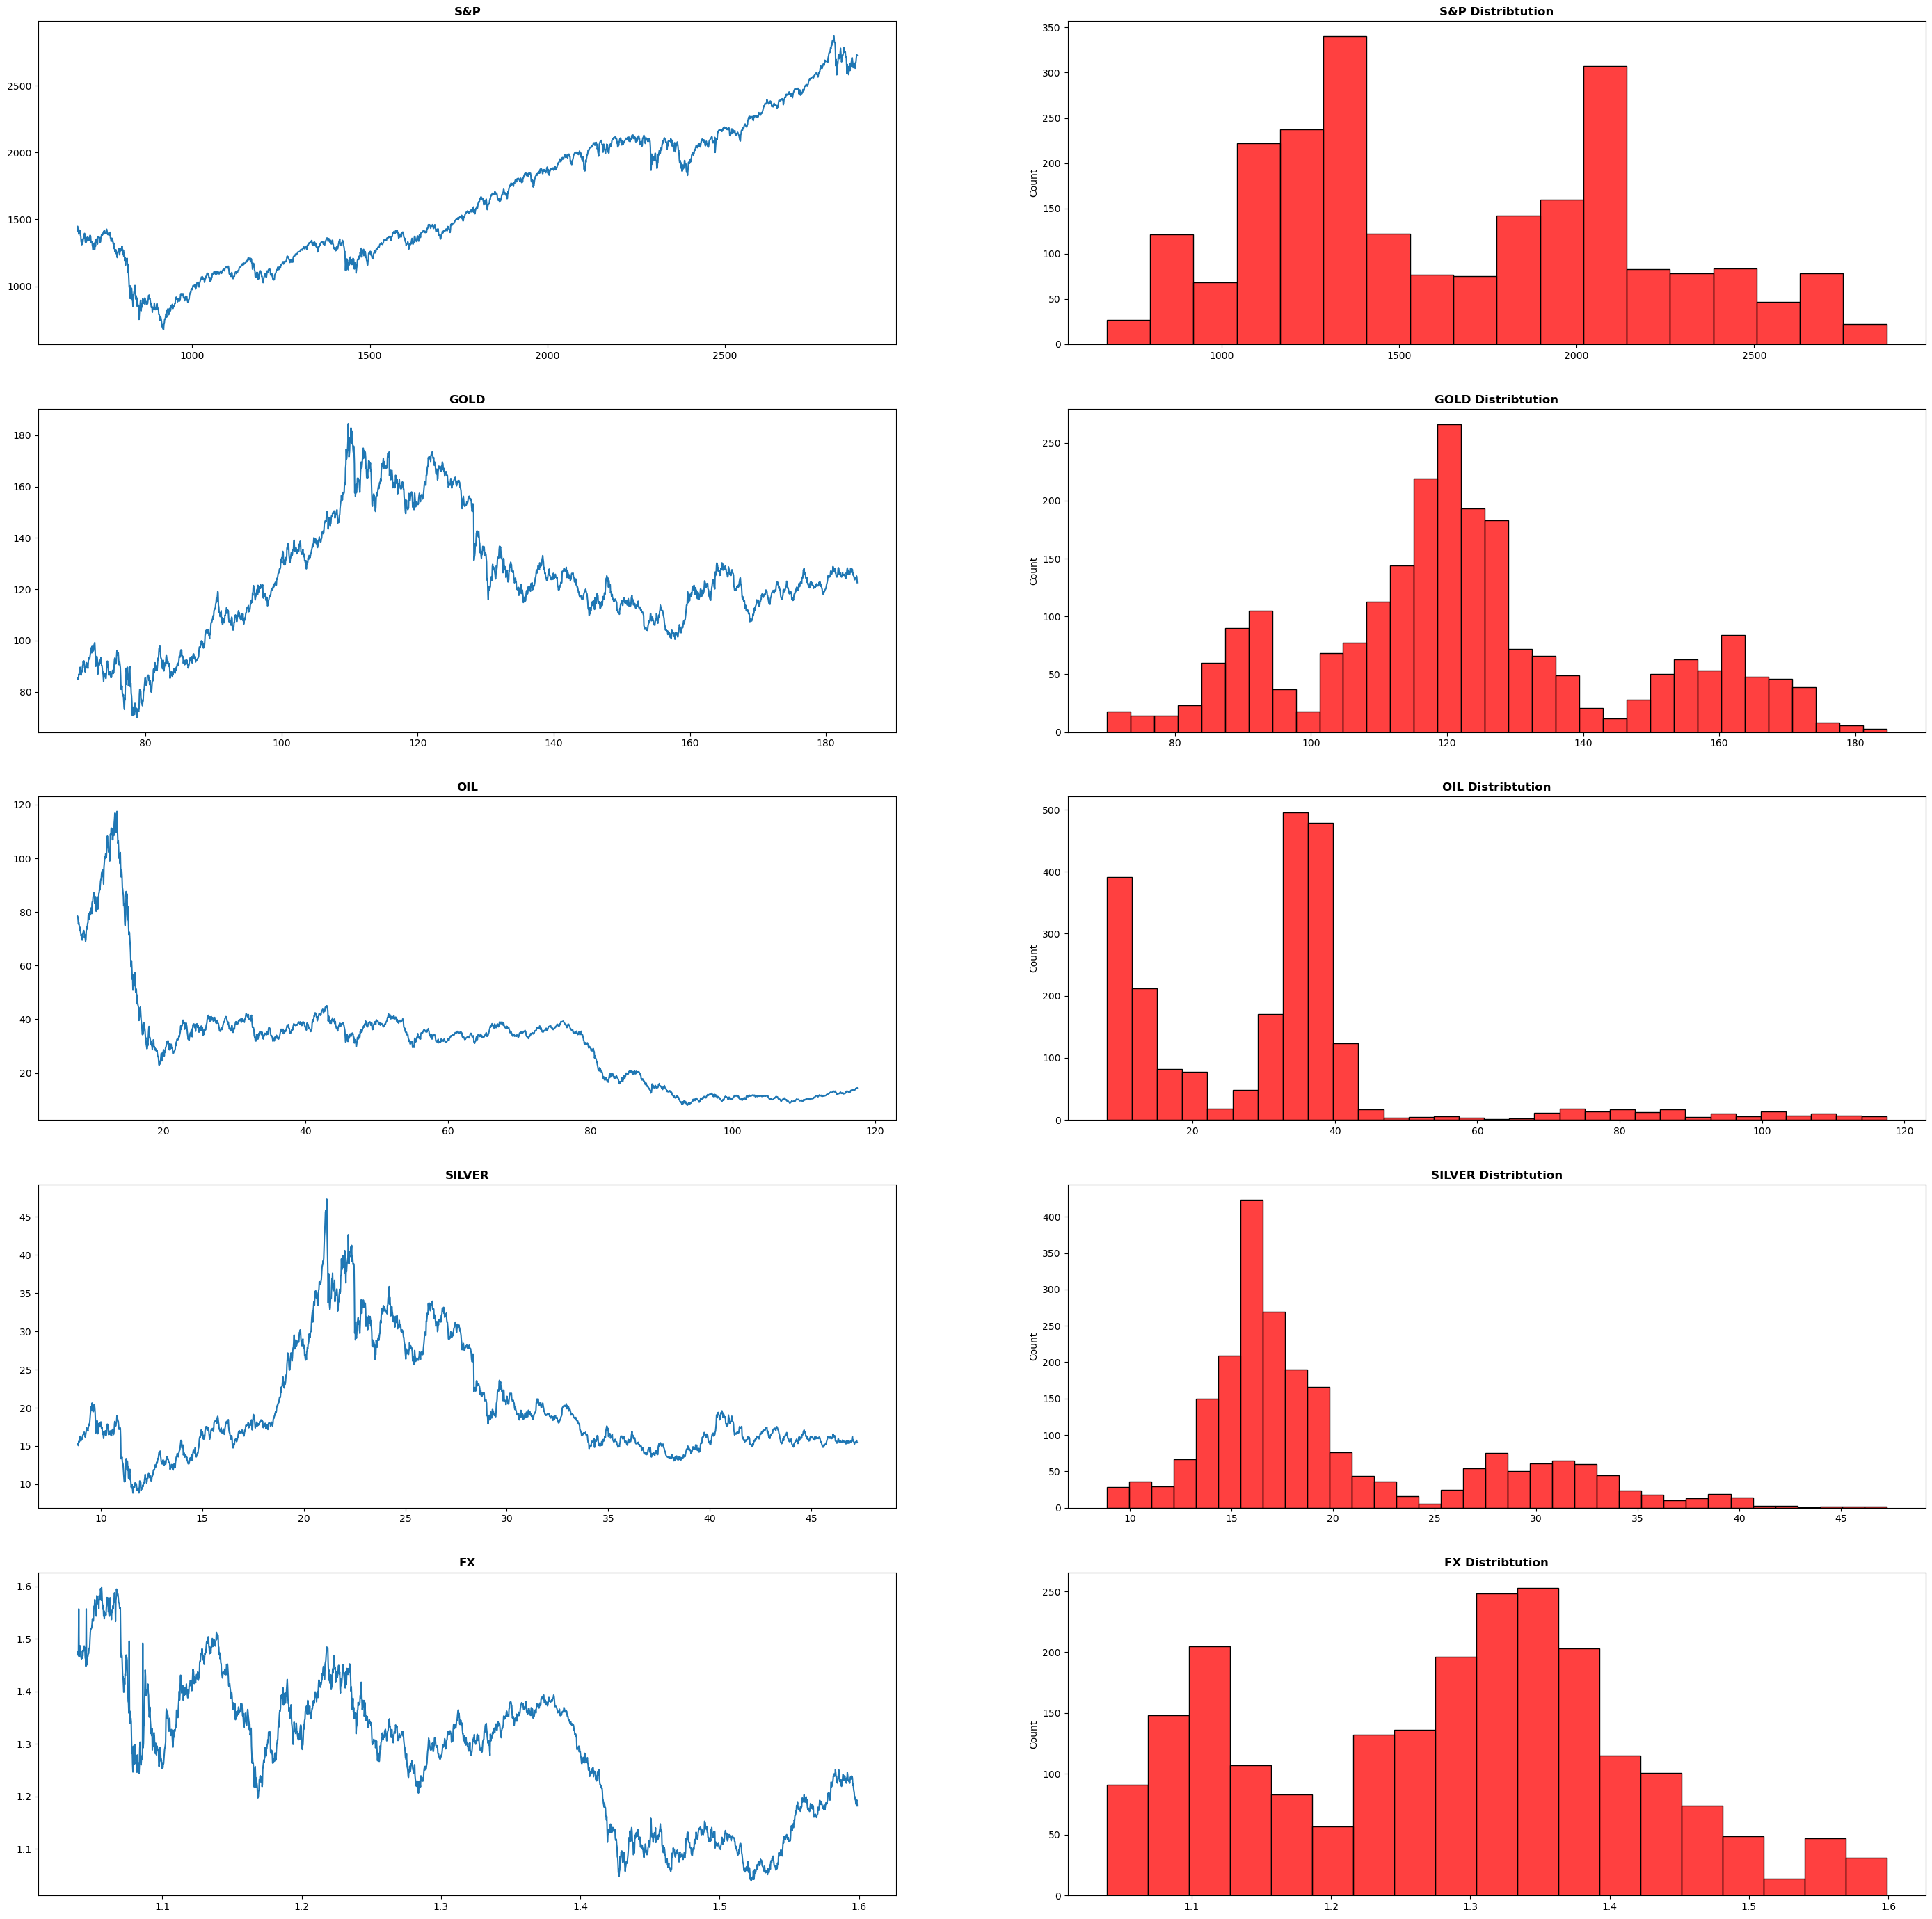

In [170]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(35, 35))

header_len = len(gold_prices_orig.columns) - 1
indeces = ["S&P","GOLD","OIL","SILVER","FX"]
for i in range(2 * header_len):
    if i % 2 == 0:
        truc = gold_prices_orig.iloc[:, int(i/2 + 1)].tolist()  # cast index to integer
        x_plot = np.linspace(min(truc), max(truc), len(truc),2990)
        row_index = i // 2  # calculate row index
        col_index = i % 2  # calculate column index
        ax[row_index, col_index].plot(x_plot, truc)
        titre = indeces[int(i/2)]
        ax[row_index, col_index].set_title(titre,fontweight='bold')

    else:
        truc = gold_prices_orig.iloc[:, int((i-1)/2 + 1)].tolist()  # cast index to integer
        row_index = i // 2  # calculate row index
        col_index = i % 2  # calculate column index
        sns.histplot(truc,color="red", ax=ax[row_index, col_index])
        titre += " Distribtution"
        ax[row_index, col_index].set_title(titre,fontweight='bold')


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


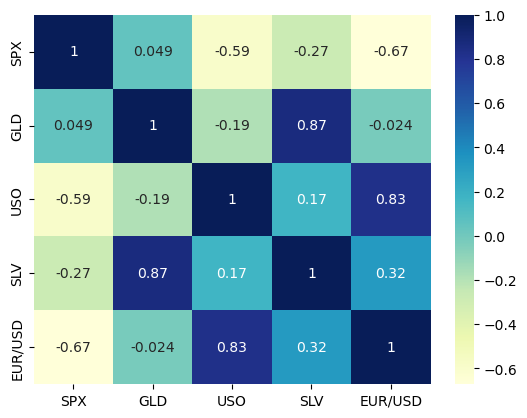

In [171]:
sns.heatmap(corr , annot= True, cmap="YlGnBu") #visualize correlation 
#We are interested in gold correlation , 2nd col of heatmap
gold_corr = correlation['GLD'] 
print(gold_corr)

# Random Forest Method:
### sklearn functions abstract the process 
### Abstracted Process is : 

1- Building bootstrap datasets by randomly sampling from the training x  data 


2 - Creating corresponding decision trees by randomly selecting candidate variables and then finding the best amoung them ( Gini coef) 


4 - Repeating and getting many trees 


5 - The variety of trees makes random variable more interesting than the regression/decision tree method.


6 - Prediction: We run new data down all the trees in random forest and see which option got more votes . 


7 -  Validate or not :  When we built the bootstrap datasets we had sampled from the dataset. In random forest, sampling can be done with repetition ; and hence we may leave some rows of the original data sets untouched : those are the "out of bag" (oob) data.
###### These out of bag rows are effectively "out of bootstrap dataset" 
In order to test for accuracy we run these out of bag dataset in the trees and see if there result is matching with the result that it gets when passed by the trees. OOB coeficient ranges btwn 0 and 1 . with 1 = perfect prediction.

 

In [172]:
X = gold_prices_orig.drop(['Date','GLD'],axis =1) #droping cols thus axis =1 
Y = gold_prices_orig['GLD'] 

#train_test_split() function from the scikit-learn library
x_train, x_test , y_train , y_test = train_test_split(X,Y,test_size =0.2, random_state = 2)
#random state for seed // and test size of conventional 80-20 split


In [173]:
regressor = RandomForestRegressor(n_estimators =  100, oob_score = True ) #oob = " out of bag" // n_estimator" = # trees 
regressor.fit(x_train,y_train)
test_data_prediction = regressor.predict(x_test)
print("OOB score:", regressor.oob_score_ ," is a good score") 

OOB score: 0.9887199669010397  is a good score


In [174]:
#I can use R2 to see how effective the model is on testing data
R2 = metrics.r2_score(y_test,test_data_prediction)
print("R squared values " , R2)

R squared values  0.9895459143326732


#### Let's plot them 

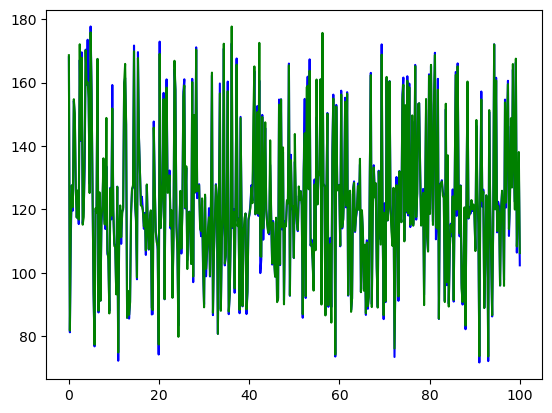

In [175]:
x = np.linspace(0,100,458)
plt.plot(x,y_test,color='blue',label = 'Actual values')
 
plt.plot(x,test_data_prediction, color = 'green', label = 'predicted line')
plt.show()
 

# THIS TAKES TIME TO LOAD: 
# PLOTTING THE FIRST TREE OF THE RANDOM FOREST
# You can find the png file in the directory , No need to run the following code



In [178]:
plt.figure(figsize=(100,100))
tree.plot_tree(regressor.estimators_[0], feature_names=X.columns, filled=True)
plt.savefig('tree')
plt.show()


# NOTES: The prediction of gold is conditional on the x data (i.e. s&p , uso , fxspot) 
## Concretely, there is a limited utility of this model when predicting future.
## In fact , the price future price of gold can be given ONLY GIVEN EXPECTED s&p , uso , fxspot. 

## KEY IDEA OF RANDOM FOREST: 
### Random forests tend to shine in scenarios where a model has a large number of features that individually have weak predicative power but much stronger power collectively.